##  네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

네이버 영화 평점 보여주는 사이트 내용 읽어오기
https://movie.naver.com/ 에서
왼쪽 메뉴 [영화랭킹]
오른쪽 [평점순(현재상영영화)] 클릭해서
url : https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200810
페이지에서 평점 추출

In [2]:
# 네이버 영화 페이지 접속해서 페이지 읽어오기
from urllib.request import urlopen

url_base = 'https://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20200810'

page = urlopen(url_base+url_sub)
soup = BeautifulSoup(page, 'html.parser')
# soup

In [3]:
# 제목이 포함된 모든 <div> 태그 추출
soup.find_all("div",{"class":"tit5"})

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=174830" title="가버나움">가버나움</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=106360" title="위대한 쇼맨">위대한 쇼맨</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=163788" title="알라딘">알라딘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=134899" title="동주">동주</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=103535" title="소원">소원</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10001" title="시네마 천국">시네마 천국</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=14448" title="패왕별희 디 오리지널">패왕별희 디 오리지널</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=146504" title="우리들">우리들</a>
 </div>,
 <div cl

In [4]:
# 1위 영화 <div> 태그 추출
soup.find_all("div",{"class":"tit5"})[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=174830" title="가버나움">가버나움</a>
</div>

In [5]:
# 1위 영화 <a> 태그 추출
soup.find("div",{"class":"tit5"}).find('a')

# soup.find_all("div",{"class":"tit5"})[0].find('a')
# soup.find_all("div",{"class":"tit5"})[0].a

<a href="/movie/bi/mi/basic.nhn?code=174830" title="가버나움">가버나움</a>

In [6]:
# 1위 영화 <a> 태그 텍스트 추출
soup.find("div",{"class":"tit5"}).find('a').text

# soup.find("div",{"class":"tit5"}).find('a').get_text
# soup.find("div",{"class":"tit5"}).find('a').string

'가버나움'

In [7]:
# 모든 영화 point 추출
soup.find_all("td",{"class":"point"})

[<td class="point">9.59</td>,
 <td class="point">9.49</td>,
 <td class="point">9.40</td>,
 <td class="point">9.38</td>,
 <td class="point">9.37</td>,
 <td class="point">9.36</td>,
 <td class="point">9.32</td>,
 <td class="point">9.31</td>,
 <td class="point">9.31</td>,
 <td class="point">9.25</td>,
 <td class="point">9.25</td>,
 <td class="point">9.23</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.08</td>,
 <td class="point">9.06</td>,
 <td class="point">9.05</td>,
 <td class="point">9.05</td>,
 <td class="point">9.04</td>,
 <td class="point">9.01</td>,
 <td class="point">8.98</td>,
 <td class="point">8.98</td>,
 <td class="point">8.96</td>,
 <td class="point">8.92</td>,
 <td class="point">8.85</td>,
 <td class="point">8.84</td>,
 <td class="point">8.82</td>,
 <td class="point">8.82</td>,
 <td class="point">8.78</td>,
 <td class="point">8.77</td>,
 <td class="point">8.76</td>,
 <td class="point">8.64</td>,
 <td class="point">8.62</td>,
 <td class

In [8]:
# 포인트 총 개수 출력
len(soup.find_all("td",{"class":"point"}))

50

In [9]:
# 1위 영화 포인트 출력
soup.find_all("td",{"class":"point"})[0].string

'9.59'

지정된 날짜에 해당되는 영화 정보 추출
2020년 5월 1일부터 100일간으로 설정
date_range() 함수 사용

In [10]:
# date_range() 함수 사용 날짜 출력
# '2020-08-10' 하루 영화 순이만 확인하기 위해 1일 간으로 설정 
# date = pd.date_range('2020-08-10',periods=1,freq='D') 
# date
# freq='D' : Day

# 나중에 100일 간으로 설정
date = pd.date_range('2020-05-03',periods=100,freq='D') 
date

DatetimeIndex(['2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
               '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
               '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
      

In [ ]:
# 리스트에서 append()와 extend()
# append() : 리스트의 맨 뒤에 추가
# extend() : 리스트에 끝에 추가
# 차이점 

# a = [1,2,3]
# a.extend/append([5,6])
# - append() : 여러 품목을 추가할 때 리스트로 추가하게 되는데,
#              리스트가 하위 리스트로 포함 예) [1,2,3,[5,6]]
# - extend() : 추가되는 리스트를 요소로 추가 예) [1,2,3,5,6]

In [ ]:
# append()
# 여러 개의 요소를 리스트로 추가할 때
# 현재 리스트의 하위 리스트로 추가됨 

In [ ]:
# extend() 예
# 여러 개의 요소를 리스트로 추가할 떄
# - 리스트의 끝에 요소로 추가됨
# - 하위 리스트로 추가되지 않음

In [11]:
# 지정된 날짜에 해당되는 영화 정보 추출

# import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date) :
    html = url_base + 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    # 날짜 형식을 문자열로 변환 : 2020-08-10 -> 20200810
    response = urlopen(html.format(date=today.strftime('%Y%m%d')))
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td','point'))
    
    # extend() 사용해서 리스트 확장하면서 리스트에 추가
    movie_date.extend([today for n in range(0, end)]) # 포인트 총개수
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, end)])
    

<ipython-input-11-cb0d63317afa>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date) :


In [ ]:
len(movie_date), len(movie_name), len(movie_point)

In [12]:
# 날짜, 영화 제목, 포인트 데이터로 데이터프레임 생성
movie = pd.DataFrame({
    'date' : movie_date,
    'name' : movie_name,
    'point' : movie_point})
movie.head()

,date,name,point
0,2020-05-03,포드 V 페라리,9.50
1,2020-05-03,어벤져스: 엔드게임,9.38
2,2020-05-03,패왕별희,9.34
3,2020-05-03,천녀유혼,9.28
4,2020-05-03,우리들,9.25


In [13]:
# 포인트 기준 내림차순 정렬
movie.sort_values(by='point', ascending=False)

,date,name,point
1894,2020-06-10,아이즈 온 미 : 더 무비,9.85
1944,2020-06-11,아이즈 온 미 : 더 무비,9.82
1994,2020-06-12,아이즈 온 미 : 더 무비,9.80
2044,2020-06-13,아이즈 온 미 : 더 무비,9.77
2094,2020-06-14,아이즈 온 미 : 더 무비,9.75
...,...,...,...
1299,2020-05-28,레이니 데이 인 뉴욕,5.20
1397,2020-05-30,나의 청춘은 너의 것,5.15
1443,2020-05-31,나의 청춘은 너의 것,5.13
149,2020-05-05,나의 청춘은 너의 것,5.06


In [14]:
# 영화별로 점수 합산
# 데이터 형 확인
movie.info()
# point가 숫자가 아닌 object로 되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4994 non-null   datetime64[ns]
 1   name    4994 non-null   object        
 2   point   4994 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 117.2+ KB


In [15]:
# point 합산을 위해 실수로 형 변환 수행
movie['point'] = movie['point'].astype(float) 
movie.info()
# point float(실수)로 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4994 non-null   datetime64[ns]
 1   name    4994 non-null   object        
 2   point   4994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 117.2+ KB


In [16]:
# 영화별로 점수 합산하고 name을 인덱스 설정
# pivot_table() 사용

import numpy as np

# name을 인덱스로 설정하고 name별로 합산
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)

# 포인트를 기준으로 내림차순 정렬
movie_best = movie_unique.sort_values(by='point',ascending=False)
movie_best.head()

,point
name,
스타 이즈 본,917.65
타오르는 여인의 초상,904.25
라라랜드,860.00
찬실이는 복도 많지,859.45
위대한 쇼맨,817.39


In [17]:
# 특정 영화 검색
# 영화 제목이 '알라딘'인 것 모두 출력
movie.loc[movie['name']=='알라딘',:]
# movie[movie['name']=='알라딘']

,date,name,point
3696,2020-07-16,알라딘,9.38
3746,2020-07-17,알라딘,9.38
3796,2020-07-18,알라딘,9.38
3846,2020-07-19,알라딘,9.38
3896,2020-07-20,알라딘,9.38
3946,2020-07-21,알라딘,9.38
3996,2020-07-22,알라딘,9.38
4046,2020-07-23,알라딘,9.38
4096,2020-07-24,알라딘,9.38
4146,2020-07-25,알라딘,9.38


In [18]:
# query() 함수 사용해서 영화 검색
movie.query('name==["알라딘"]')
# 동일
# movie.loc[movie['name']=='알라딘',:]

,date,name,point
3696,2020-07-16,알라딘,9.38
3746,2020-07-17,알라딘,9.38
3796,2020-07-18,알라딘,9.38
3846,2020-07-19,알라딘,9.38
3896,2020-07-20,알라딘,9.38
3946,2020-07-21,알라딘,9.38
3996,2020-07-22,알라딘,9.38
4046,2020-07-23,알라딘,9.38
4096,2020-07-24,알라딘,9.38
4146,2020-07-25,알라딘,9.38


In [19]:
# 행 수 출력 : 알라딘의 경우
len(movie.query('name==["알라딘"]'))

26

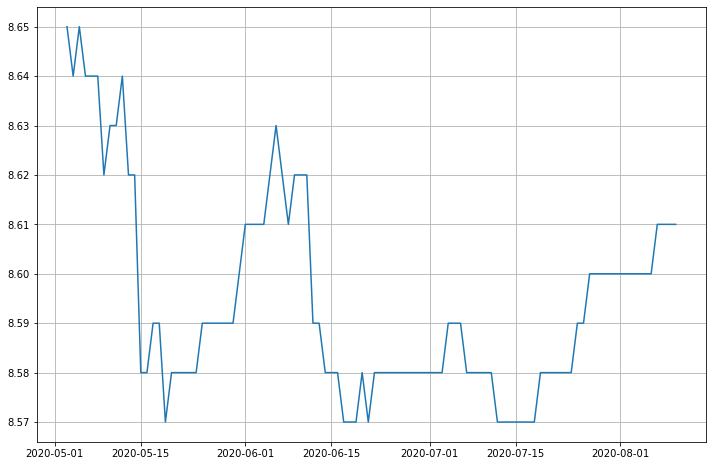

In [20]:
# 날짜별 포인트를 그래프로 출력
import matplotlib.pyplot as plt
%matplotlib inline

tmp = movie.query('name==["찬실이는 복도 많지"]')

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.grid()
plt.show()

## 영화별 날짜 변화에 따른 평점 변화 확인하기

In [21]:
# 영화별 날짜 변화에 따른 평점 변화 확인
# date을 인덱스로 설정
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head(10)

point                                                     \
name        1917 5일의 마중 7번방의 선물 B급 며느리 가버나움 가장 따뜻한 색, 블루 강철비2: 정상회담   
date                                                                  
2020-05-03  8.88    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-04  8.88    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-05  8.88    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-06  8.88    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-07  8.88    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-08  8.88    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-09  8.87    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-10  8.87    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-11  8.87    NaN     NaN    NaN  NaN          NaN        NaN   
2020-05-12  8.87    NaN     NaN    NaN  NaN          NaN        NaN   

                                      ...                               \
name       개를 훔치는 완벽한 방법 걷기왕 걸어도 걸어도  ... 피아노의 숲 피아니스트의 전설 하이큐!! 끝과 시작   
date                                  ...                                
2020-05-03          9.01 NaN     NaN  ...    NaN       NaN         NaN   
2020-05-04          9.01 NaN     NaN  ...    NaN       NaN         NaN   
2020-05-05          9.01 NaN     NaN  ...    NaN       NaN         NaN   
2020-05-06          9.01 NaN     NaN  ...    NaN       NaN        8.92   
2020-05-07          9.02 NaN     NaN  ...    NaN       NaN        8.92   
2020-05-08          9.02 NaN     NaN  ...    NaN       NaN        8.92   
2020-05-09          9.02 NaN     NaN  ...    NaN       NaN        8.92   
2020-05-10          9.02 NaN     NaN  ...    NaN       NaN        8.92   
2020-05-11          9.02 NaN     NaN  ...    NaN       NaN         NaN   
2020-05-12          9.02 NaN     NaN  ...    NaN       NaN        8.92   

                                                                   
name       하이큐!! 승자와 패자 하이큐!! 재능과 센스 행복 목욕탕 헤이트풀8 현기증 호우시절 호텔 레이크  
date                                                               
2020-05-03          NaN          NaN    NaN   NaN NaN  NaN    NaN  
2020-05-04          NaN          NaN    NaN   NaN NaN  NaN    NaN  
2020-05-05          NaN          NaN    NaN   NaN NaN  NaN   5.75  
2020-05-06          9.0         9.15    NaN   NaN NaN  NaN    NaN  
2020-05-07          9.0         9.15    NaN   NaN NaN  NaN    NaN  
2020-05-08          9.0         9.15    NaN   NaN NaN  NaN    NaN  
2020-05-09          9.0         9.15    NaN   NaN NaN  NaN    NaN  
2020-05-10          9.0         9.15    NaN   NaN NaN  NaN    NaN  
2020-05-11          NaN          NaN    NaN   NaN NaN  NaN    NaN  
2020-05-12          9.0         9.15    NaN   NaN NaN  NaN    NaN  

[10 rows x 228 columns]

In [22]:
# movie pivot을 csv 파일로 저장
movie_pivot.to_csv('../data/03. movie_pivot.csv',
                  sep=',',
                  encoding='utf-8')

In [23]:
movie_pivot.to_csv('../data/03. movie_pivot_euc_kr.csv',
                  sep=',',
                  encoding='euc_kr')

In [24]:
# 다중 인덱스 컬럼(열) 제거 : point 제거
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,1917,5일의 마중,7번방의 선물,B급 며느리,가버나움,"가장 따뜻한 색, 블루",강철비2: 정상회담,개를 훔치는 완벽한 방법,걷기왕,걸어도 걸어도,...,피아노의 숲,피아니스트의 전설,하이큐!! 끝과 시작,하이큐!! 승자와 패자,하이큐!! 재능과 센스,행복 목욕탕,헤이트풀8,현기증,호우시절,호텔 레이크
date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,8.88,NaN,NaN,NaN,NaN,NaN,NaN,9.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04,8.88,NaN,NaN,NaN,NaN,NaN,NaN,9.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,8.88,NaN,NaN,NaN,NaN,NaN,NaN,9.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75
2020-05-06,8.88,NaN,NaN,NaN,NaN,NaN,NaN,9.01,NaN,NaN,...,NaN,NaN,8.92,9.0,9.15,NaN,NaN,NaN,NaN,NaN
2020-05-07,8.88,NaN,NaN,NaN,NaN,NaN,NaN,9.02,NaN,NaN,...,NaN,NaN,8.92,9.0,9.15,NaN,NaN,NaN,NaN,NaN


In [26]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

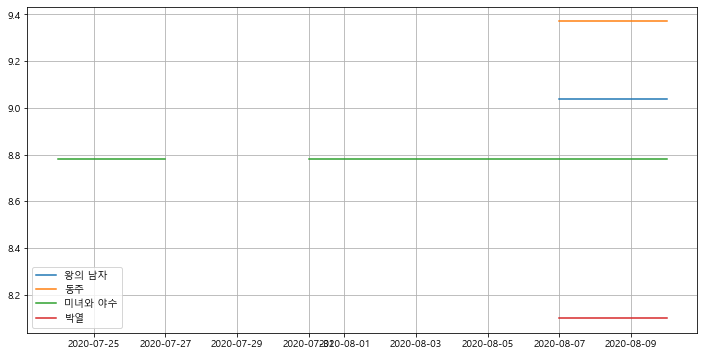

In [27]:
# 특정 영화 몇 개월 지정해서 날짜별 평점 변화 확인
target_col = ['왕의 남자','동주','미녀와 야수','박열']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='lower left') # loc 위치 : 왼쪽 아래
plt.grid()
plt.show()